# Inference & Evaluation for Our Model

## Importing Data & Libraries

In [1]:
! pip install --upgrade scipy networkx
! pip3 install nltk
! pip install --upgrade scipy
! pip install rouge
!pip install -U sentence-transformers

  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.6
    Uninstalling networkx-2.8.6:
      Successfully uninstalled networkx-2.8.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.0.0 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
     |████████████████████████████████| 1.5 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 13.4 MB/s  eta 0:00:01
     |████████████████████████████████| 85 kB 3.6 MB/s eta 0:00:011
     |████████████████████████████████| 24.2 MB 6.2 MB/s eta 0:

In [1]:
import scipy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nltk
import json
from queue import Queue
import matplotlib.pyplot as mp
from sentence_transformers import SentenceTransformer
from statistics import mean
from bs4 import BeautifulSoup
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sarchakr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
g = pickle.load(open('./combined_timeframe_unweighted_clustered_cso_json.gpickle', 'rb'))

In [3]:
cso_df = pd.read_csv("CSO_data/CSO_entities_ensembled_Sign_bart-large-cnn-samsum.csv", index_col=0)
cso_df.head()

,cso_number,symptom,root_cause,remediations,description,short_description,affected_services,child_cso,short_term_fix,customer_impacts
0,17536,The Adobe Sign Customized Email Template (CEMT...,Sign Business Intelligence team implemented a ...,There are none.,Adobe Sign Customized Email Template users are...,Adobe Sign - Customized Email Template microse...,"316391, 320691",NaN,The BI change was rolled back and APO team cle...,Customized Email Template (CEMT) microservice ...
1,17522,Starting on 2022-05-24 between 11:29 UTC and 1...,canary deployment.,There are none.,Incident description: Cloudwatch check for 5xx...,Identity Management Services,"318561, 318560, 318205, 321727, 320998, 321962...",NaN,There will be a rollback of the rollback.,downstream services could have experience re-...
2,17510,Microsoft Office365 Provider microservice expo...,The problem was caused by a misstep in convert...,Review the manual testing procedure with team ...,Microsoft Office365 Provider unable to run com...,Microsoft Office365 Provider,317501,NaN,the data structure that is called.,Some commands in the Microsoft Office365 Provi...
3,17401,Some Adobe Sign users might have been unable t...,Some North America Adobe Sign users might have...,Review the SOP for DB nodes upgrades. Validate...,Incident description: Adobe Sign NA2 Compose P...,Adobe Sign North America 2,"321671, 323232, 321670, 323231, 323230, 317791...",17402,was set as primary node.,Some North America Adobe Sign users might have...
4,17368,The PDFcombiner worker for Sign North America ...,The Sign service operates as a distributed sys...,There is an underlying bug in JMS message hand...,Agreements are getting stuck,Adobe Sign - Adobe Sign North America 3,"322299, 318358",NaN,instances were restarted.,3900 requests expired during the impact window...


In [4]:
alert_df = pd.read_csv("./Alerts_data/alert_id_mapping.csv", index_col=0)
alert_df.head()

,alert_name,id
0,quartz_scheduler_down_alert,0
1,qpid shardau1toeu1q queuesize,1
2,Splunk Alert: TechOps - JMS Send Failure,2
3,app server load5 is high,3
4,Pingdom check Adobe Sign DNS Test,4


In [5]:
df_alerts_sorted = pd.read_csv('./Alerts_data/all_alerts_parsed.csv', index_col=0)
df_alerts_sorted['created_at'] = pd.to_datetime(df_alerts_sorted['created_at'])
df_alerts_sorted = df_alerts_sorted.sort_values(by = 'created_at')
timelist_alerts = list(df_alerts_sorted['created_at'])
numberlist_alerts = list(df_alerts_sorted['incident_number'])

with open('./CSO_data/CSO_all_scraped_Sign.json', 'r') as f:
    data = json.load(f)

cso_data = {'cso_number':[], 'start_time':[], 'end_time':[]}
for cso, value in data.items():
    cso_data['cso_number'].append(cso)
    cso_data['start_time'].append(value['primaryIncident']['u_cso_started'])
    cso_data['end_time'].append(value['primaryIncident']['u_cso_ended'])


In [6]:
cso_time_df = pd.DataFrame(cso_data)

In [7]:
cg = pickle.load(open('./causal_graph_data/cg_unweighted_filtered.gpickle', 'rb'))
cg_alert_id = nx.get_node_attributes(cg, "alert_id")
alert_ids = [v for k,v in cg_alert_id.items()]

In [8]:
json_file = data

In [9]:
alert_names = df_alerts_sorted.copy()

In [10]:
cso_descr = pd.read_csv("./CSO_data/cso_alert.csv")
len(cso_descr)

76

In [11]:
json_file.keys()

dict_keys(['17536', '17522', '17510', '17401', '17368', '17088', '16755', '16742', '16649', '16644', '16624', '16589', '16571', '16536', '16532', '16516', '16480', '16425', '16280', '16263', '15934', '15873', '15869', '15849', '15839', '15763', '15739', '15704', '15572', '15560', '15558', '15539', '15493', '15484', '15463', '15461', '15334', '15221', '15215', '15126', '15019', '15005', '14965', '14961', '14947', '14932', '14902', '14886', '14865', '14804', '14797', '14767', '14757', '14722', '14710', '14573', '14452', '14449', '14385', '14379', '14377', '14224', '14073', '14055', '13850', '13840', '13808', '13738', '13678', '13662', '13660', '13630', '13558', '12826', '12686', '12626', '12615', '12606', '12187', '12088', '12078', '12070', '12052', '12041', '11993', '11952', '11892', '11379', '10999', '10991', '10961', '10850', '10835', '10769', '10658', '10625', '10601', '10597', '10459', '10395', '10384', '10336', '10320', '10302', '10286', '10190', '10182', '9828', '9670', '9632', '9

### Preprocessing some data

In [12]:
def slicer(my_str,sub):
    index=my_str.find(sub)
    if index !=-1 :
        return my_str[index+8:] 
    else :
        raise Exception(my_str,' -----Sub string not found!')

In [13]:
def html_stripper(code):
    return BeautifulSoup(code).get_text().replace('\r',' ').replace('\xa0',' ').replace('\n',' ')

In [14]:
## Removing region name from CSO-alert description
cso_descr_data = []
for index, row in cso_descr.iterrows():
    #print(z)
    z = row['cso_number']
    x = row['description']
    try:
        y = slicer(x,"<br><br>")
        cso_descr_data.append([z,y])
    except:
        continue
cso_descr_df = pd.DataFrame(cso_descr_data, columns=['cso_number', 'descr'])
len(cso_descr_df)

74

In [15]:
cso_descr_df

,cso_number,descr
0,17368,Agreements are getting stuck
1,15586,Incident description: Pingdom check of Adobe S...
2,13750,Incident description: Pingdom check of Adobe S...
3,14774,Some customers are unable to login to Adobe Si...
4,15558,KBA auth is failing as KBA was down
...,...,...
69,16536,S3 Storage Outage
70,15666,Issues when sending bulk agreements
71,15663,Webhook is not working in HSBC
72,15007,EU sign in problems


## Functions to Retrieve Required Information

In [16]:
inc_dict = {}
for i, inc in enumerate(numberlist_alerts):
    inc_dict[str(inc)] = i

In [17]:
def get_alerts_by_cso(cso, n=3):
    timestr = cso_time_df[cso_time_df['cso_number'] == cso]['start_time'].iloc[0]   # gets cso timestr
    timeend = cso_time_df[cso_time_df['cso_number'] == cso]['end_time'].iloc[0]
    
    timestr = pd.Timestamp(timestr, tz="UTC")
    timeend = pd.Timestamp(timeend, tz="UTC")

    if timestr < timelist_alerts[0]:
        timestr = timelist_alerts[0]
    
    if timeend < timelist_alerts[0]:
        timeend = timelist_alerts[0]
        
    alerts_timeframe = get_alerts_by_time(timestr, timeend, n)
    new_alerts_timeframe = [df_alerts_sorted['alert_id'].iloc[inc_dict[str(alert)]] for alert in alerts_timeframe]
    
    return new_alerts_timeframe
    

In [65]:
'''
# OLD Method 
def get_alerts_by_cso(cso_number, n=3):
    timestr = cso_time_df[cso_time_df['cso_number'] == cso_number]['start_time'].iloc[0]
    timestr = timestr.split(' ')[0] + 'T' + timestr.split(' ')[1][:-6] + 'Z'
    if timestr >= timelist_alerts[0]:## don't have alerts before that
        alerts_timeframe = get_alerts_by_time(timestr,n)
        alerts_timeframe = [df_alerts_sorted['alert_id'].iloc[inc_dict[str(alert)]] for alert in alerts_timeframe]
        new_alerts_timeframe = [a for a in alerts_timeframe if a < 744]
        return new_alerts_timeframe
    else:
        print("No alerts for",cso_number)
        return []
'''

'\n# OLD Method \ndef get_alerts_by_cso(cso_number, n=3):\n    timestr = cso_time_df[cso_time_df[\'cso_number\'] == cso_number][\'start_time\'].iloc[0]\n    timestr = timestr.split(\' \')[0] + \'T\' + timestr.split(\' \')[1][:-6] + \'Z\'\n    if timestr >= timelist_alerts[0]:## don\'t have alerts before that\n        alerts_timeframe = get_alerts_by_time(timestr,n)\n        alerts_timeframe = [df_alerts_sorted[\'alert_id\'].iloc[inc_dict[str(alert)]] for alert in alerts_timeframe]\n        new_alerts_timeframe = [a for a in alerts_timeframe if a < 744]\n        return new_alerts_timeframe\n    else:\n        print("No alerts for",cso_number)\n        return []\n'

In [18]:
def get_alerts_by_time(start_time, end_time, num):                                           # the input time and the number of different recorded past alert times, we want alerts from
    lst = []
    low = 0
    mx = len(timelist_alerts)
    high = mx
    while(low<high):
        if(timelist_alerts[int((low+high)/2)] > start_time):
            high = int((low+high)/2)
        else:
            low = int((low+high)/2)+1
    ind = low-1
    #num = 3
    j = 0
    k = 0
    #print(low)
    while(j < low-1 and (start_time - timelist_alerts[low-1-j]) < pd.Timedelta(hours=1)):
        lst.append(numberlist_alerts[low - 1 -j])
        while(j<low-1 and timelist_alerts[low-1-j] == timelist_alerts[low-2-j]):
            lst.append(numberlist_alerts[low-2-j])
            j = j + 1
        j = j + 1
        k = k + 1
    j = low
    k = 0
    while(j<mx and (end_time - timelist_alerts[j]) > pd.Timedelta(minutes=1)):
        lst.append(numberlist_alerts[j])
        while(j<mx-1 and timelist_alerts[j] == timelist_alerts[j+1]):
            lst.append(numberlist_alerts[j+1])
            j = j + 1
        j = j + 1
        k = k + 1
    return list(set(lst))

In [19]:
def get_top_n_rc(cso_dict, n):
    return dict(sorted(cso_dict.items(), key=lambda x: x[1], reverse=True)[:n])

In [20]:
def get_alert_name_from_id(alert_id):
    temp = alert_df.index[alert_df['id']==alert_id].tolist()
    for i in temp:
        return alert_df['alert_name'][i]

In [21]:
def get_sym_description(cso_number):
    temp = cso_df.index[cso_df['cso_number']==int(cso_number)].tolist()[0]
    return cso_df['symptom'][temp]

In [22]:
def get_rc_description(cso_number):
    temp = cso_df.index[cso_df['cso_number']==int(cso_number)].tolist()[0]
    return cso_df['root_cause'][temp]

In [23]:
def get_rem_description(cso_number):
    temp = cso_df.index[cso_df['cso_number']==int(cso_number)].tolist()[0]
    return cso_df['remediations'][temp]

## Inference Functions

### Pred: path-based inference method, unidirectional graph traversal

In [24]:
## visited directory, one direction traversal
def find_rc_single_alert_vis_oned(alert_id, k, g, q, visited_dict):
    alert_id_cg = {value:key for key,value in cg_alert_id.items()}
    
    rc = {}
    while(not q.empty()):
        (node, k_) = q.get()
        if k_ > 0:            
            for (u, v, dic) in g.out_edges(alert_id_cg[node], data = True):
                if (not visited_dict[v]):
                    if (dic['label'] == 'caused by') or (dic['label'] == 'causes'):
                        visited_dict[v] = True
                        q.put((cg_alert_id[v], k_ - 1))
                    elif (dic['label'] == 'caused CSO') or (dic['label'] == 'alert-symptom link'):
                        if v[:-4] in rc.keys():
                            rc[v[:-4]] += 1/(k-k_+1)
                        else:
                            rc[v[:-4]] = 1/(k-k_+1)
                
    return rc

In [25]:
def find_rc_for_set(alert_ids,k,g):
    rc = {}
    visited_dict = {}
    for node in g.nodes():
        visited_dict[node] = False
    q = Queue()
    if(isinstance(alert_ids,list)):
        for alert_id in alert_ids:
            visited_dict[alert_id] = True
            q.put((alert_id,k))
            temp = find_rc_single_alert_vis_oned(alert_id, k, g, q, visited_dict)
            for foo in temp.keys():
                if foo in rc.keys():
                    rc[foo] += temp[foo]
                else:
                    rc[foo] = temp[foo]
        for node in g.nodes():
            visited_dict[node] = False
    else:
        visited_dict[alert_ids] = True
        q.put((alert_ids,k))
        rc = find_rc_single_alert_vis(alert_ids, k, g, q, visited_dict)
    foo= dict(sorted(rc.items(), key=lambda x: x[1], reverse=True)[::])
    poo = {}
    for i in foo.keys():
        poo[int(i)] = foo[i]
    return poo

In [26]:
def find_rc_for_set_normalised(alert_ids,k,g):
    rc = {}
    visited_dict = {}
    for node in g.nodes():
        visited_dict[node] = False
    q = Queue()
    
    for alert_id in alert_ids:
        visited_dict[alert_id] = True
        q.put((alert_id,k))
        temp = find_rc_single_alert_vis_oned(alert_id, k, g, q, visited_dict)
        for foo in temp.keys():
            if foo in rc.keys():
                rc[foo] += temp[foo]
            else:
                rc[foo] = temp[foo]
    for node in g.nodes():
        visited_dict[node] = False
    
    foo= dict(sorted(rc.items(), key=lambda x: x[1], reverse=True)[::])
    norm_factor = sum(list(foo.values()))
    poo = {}
    for i in foo.keys():
        poo[int(i)] = foo[i]/norm_factor
    return poo

#### Using weights

In [27]:
## visited directory, one direction traversal
def find_rc_single_alert_vis_oned_weights(alert_id, k, g, q, visited_dict):
    alert_id_cg = {value:key for key,value in cg_alert_id.items()}
    
    rc = {}
    while(not q.empty()):
        (node, k_, w) = q.get()
        if k_ > 0:            
            for (u, v, dic) in g.out_edges(alert_id_cg[node], data = True):
                if (not visited_dict[v]):
                    if (dic['label'] == 'caused by') or (dic['label'] == 'causes'):
                        visited_dict[v] = True
                        edge_wt = max([x[1] for x in dic['weights']])
                        q.put((cg_alert_id[v], k_ - 1, w*edge_wt))
                    elif (dic['label'] == 'caused CSO') or (dic['label'] == 'alert-symptom link'):
                        if v[:-4] in rc.keys():
                            rc[v[:-4]] += w#/(k-k_+1)
                        else:
                            rc[v[:-4]] = w#/(k-k_+1)
                
    return rc

In [28]:
def find_rc_for_set_weights(alert_ids,k,g):
    rc = {}
    visited_dict = {}
    for node in g.nodes():
        visited_dict[node] = False
    q = Queue()
    
    for alert_id in alert_ids:
        visited_dict[alert_id] = True
        q.put((alert_id,k,1))
        temp = find_rc_single_alert_vis_oned_weights(alert_id, k, g, q, visited_dict)
        for foo in temp.keys():
            if foo in rc.keys():
                rc[foo] += temp[foo]
            else:
                rc[foo] = temp[foo]
    for node in g.nodes():
        visited_dict[node] = False
    
    foo= dict(sorted(rc.items(), key=lambda x: x[1], reverse=True)[::])
    #norm_factor = sum(list(foo.values()))
    poo = {}
    for i in foo.keys():
        poo[int(i)] = foo[i]#/norm_factor
    return poo

### Doublepred: Path-based inference method, bidirectional graph traversal

In [29]:
## bfs approach would make sure that whenever a node is discovered, it is with the largest value of k possible
def find_rc_single_alert_vis(alert_id, k, g, q, visited_dict):
    alert_id_cg = {value:key for key,value in cg_alert_id.items()}
    
    rc = {}
    while(not q.empty()):
        (node, k_) = q.get()
        if k_ > 0:
            for (u, v) in g.in_edges(alert_id_cg[node]):
                if (not visited_dict[u]):
                    visited_dict[u] = True
                    q.put((cg_alert_id[u], k_ - 1))
            
            for (u, v, dic) in g.out_edges(alert_id_cg[node], data = True):
                if (not visited_dict[v]):
                    if (dic['label'] == 'caused by') or (dic['label'] == 'causes'):
                        visited_dict[v] = True
                        q.put((cg_alert_id[v], k_ - 1))
                    elif (dic['label'] == 'alert-symptom link') or (dic['label'] == 'caused CSO'):
                        if v[:-4] in rc.keys():
                            rc[v[:-4]] += 1/(k-k_+1)
                        else:
                            rc[v[:-4]] = 1/(k-k_+1)
                
    return rc

In [30]:
def find_rc_for_set_doublepred(alert_ids,k,g):
    rc = {}
    visited_dict = {}
    for node in g.nodes():
        visited_dict[node] = False
    q = Queue()
    if(isinstance(alert_ids,list)):
        for alert_id in alert_ids:
            visited_dict[alert_id] = True
            q.put((alert_id,k))
            temp = find_rc_single_alert_vis(alert_id, k, g, q, visited_dict)
            for foo in temp.keys():
                if foo in rc.keys():
                    rc[foo] += temp[foo]
                else:
                    rc[foo] = temp[foo]
        for node in g.nodes():
            visited_dict[node] = False
    else:
        visited_dict[alert_ids] = True
        q.put((alert_ids,k))
        rc = find_rc_single_alert_vis(alert_ids, k, g, q, visited_dict)
    foo= dict(sorted(rc.items(), key=lambda x: x[1], reverse=True)[::])
    poo = {}
    for i in foo.keys():
        poo[int(i)] = foo[i]
    return poo

### Similarity-based Inference Method (NLP) - SBert

In [31]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [32]:
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

In [33]:
def get_similar_cso_from_description_sbert(description):
    symptom_list = cso_df['symptom'].to_list()
    symptom_list.append(description)
    embeddings = model_sbert.encode(symptom_list)
    similarity_dict = {}
    for i in range(len(embeddings)-1):
        similarity_dict[int(cso_df.iloc[i]['cso_number'])] = cosine(embeddings[-1], embeddings[i])
    return similarity_dict

In [34]:
def cso_similarity_sbert(cso1, cso2):
    emb1 = model_sbert.encode(cso1)
    emb2 = model_sbert.encode(cso2)
    
    return cosine(emb1, emb2)

### Similarity-based Inference Method (NLP) - BERT Embeddings

In [190]:
from transformers import BertTokenizer, BertModel
import torch

model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,)
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [191]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT
    
    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.
    
    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids
        
    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids
    
    
    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors

In [192]:
def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model
    
    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids
    
    Returns:
        list: List of list of floats of size
            [n_tokens, n_embedding_dimensions]
            containing embeddings for each token
    
    """
    
    # Gradient calculation id disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs[2][1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

    return list_token_embeddings

In [204]:
def get_symptom_embeddings():
    symptom_list = cso_df['symptom'].to_list()
    
    embeddings = []
    for i in range(len(symptom_list)):
        tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(symptom_list[i], tokenizer_bert)
        list_token_embeddings = np.array(get_bert_embeddings(tokens_tensor, segments_tensors, model_bert))
        sentence_embed = np.mean(list_token_embeddings, axis=0)
        embeddings.append(sentence_embed)
    
    return embeddings

In [205]:
def get_similar_cso_from_description_bert(description, embeddings):
    tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(description, tokenizer_bert)
    list_token_embeddings = np.array(get_bert_embeddings(tokens_tensor, segments_tensors, model_bert))
    sentence_embed = np.mean(list_token_embeddings, axis=0)
    
    similarity_dict = {}
    for i in range(len(embeddings)):
        similarity_dict[int(cso_df.iloc[i]['cso_number'])] = cosine(sentence_embed, embeddings[i])
    return similarity_dict

In [206]:
def get_similar_cso_from_description_bert_with_embed(cso_embed, embeddings):    
    similarity_dict = {}
    for i in range(len(embeddings)):
        similarity_dict[int(cso_df.iloc[i]['cso_number'])] = cosine(cso_embed, embeddings[i])
    return similarity_dict

In [209]:
def cso_similarity_bert(cso1, emb2):
    tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(cso1, tokenizer_bert)
    list_token_embeddings = np.array(get_bert_embeddings(tokens_tensor, segments_tensors, model_bert))
    emb1 = np.mean(list_token_embeddings, axis=0)
    
    return cosine(emb1, emb2)

### Merging NLP-based scores and Path-based scores (Score 1 + beta * theta * Score 2)

In [35]:
def combine_scores(rc_dict1,similarity_dict1, beta):
    final_dict = {}
    rc_dict = rc_dict1.copy()
    similarity_dict = similarity_dict1.copy()
    
    if len(rc_dict.keys()) == 0:
        theta_factor = 1
    else:
        theta_factor = mean(list(rc_dict.values()))/ mean(list(similarity_dict.values()))
    
    for j in similarity_dict.keys():
        if j in rc_dict.keys():
            temp = rc_dict[j] + beta_factor*theta_factor*similarity_dict[j]
            final_dict[j] = temp 
        else:
            temp = beta_factor*theta_factor*similarity_dict[j]
            final_dict[j] = temp
    
    return final_dict


### Merge CG and KG graph with KG clusters into effect

In [36]:
def find_symptom_cluster_for_set(alert_ids, k, g, cso_cluster_map):
    cluster = {}
    visited_dict = {}
    for node in g.nodes():
        visited_dict[node] = False
        
    q = Queue()
    if not isinstance(alert_ids, list):
        new_alert_ids = [alert_ids]
    else:
        new_alert_ids = alert_ids
        
    for alert_id in new_alert_ids:
        visited_dict[alert_id] = True
        q.put((alert_id, k))
        temp = find_rc_single_alert_vis_oned(alert_id, k, g, q, visited_dict)

        for foo in temp.keys():
            cl = cso_cluster_map[foo]
            if cl in cluster:
                cluster[cl] += 1
            else:
                cluster[cl] = 1

    for node in g.nodes():
        visited_dict[node] = False
                    
    foo= dict(sorted(cluster.items(), key=lambda x: x[1], reverse=True)[::])
    return foo

In [37]:
def create_rf_inference_df(alert_ids, alert_id_map):
    reverse_map = {v:k for k,v in alert_id_map.items()}
    all_alerts = list(reverse_map.keys())
    
    l = np.zeros(shape=len(all_alerts))
    
    for alert in alert_ids:
        l[reverse_map[alert]] = 1
    
    df = pd.DataFrame([l], columns=all_alerts)
    return df

In [38]:
def rank_cluster(clusters, n_clusters, rf_model, X):
    y_pred_proba = rf_model.predict_proba(X).reshape(-1)
    
    rf_clusters = {float(i):y_pred_proba[i] for i in range(len(y_pred_proba))}
    cluster_rank = dict(sorted(rf_clusters.items(), key=lambda x: x[1], reverse=True)[::])
    
    return cluster_rank

In [225]:
def find_rc_set_sbert(clusters, K, cso_cluster_map, cso_embedding):
    cluster_cso_map = {v:k for k,v in cso_cluster_map.items()}
    
    combined_pred = {}
    count = 0
    for cl, _ in sorted(clusters.items(), reverse=True):
        all_csos = [v for k,v in cluster_cso_map.items() if k == cl]
        for i in all_csos:
            combined_pred[i] = cso_similarity_sbert(cso_df[cso_df['cso_number'] == int(i)]['symptom'].item(), cso_embedding)
        count += 1
    
    return combined_pred

In [226]:
def find_rc_set_bert(clusters, K, cso_cluster_map, cso_embedding):
    cluster_cso_map = {v:k for k,v in cso_cluster_map.items()}
    
    combined_pred = {}
    count = 0
    for cl, _ in sorted(clusters.items(), reverse=True):
        all_csos = [v for k,v in cluster_cso_map.items() if k == cl]
        for i in all_csos:
            combined_pred[i] = cso_similarity_bert(cso_df[cso_df['cso_number'] == int(i)]['symptom'].item(), cso_embedding)
        count += 1
    
    return combined_pred

In [41]:
node_cluster_map = nx.get_node_attributes(g, "cluster_id")
cso_cluster_map = {k.split('_')[0]:v for k,v in node_cluster_map.items()}
n_clusters = len(set([v for v in cso_cluster_map.values()]))
rf = pickle.load(open('random_forest.pickle', 'rb'))

i=14757

df = create_rf_inference_df(get_alerts_by_cso(str(i)), nx.get_node_attributes(g, "alert_id"))

clust1 = find_symptom_cluster_for_set(get_alerts_by_cso(str(i)), 10, g, cso_cluster_map)
clust2 = rank_cluster(clust1, n_clusters, rf, df)

s = sum([1.0/v for k,v in clust1.items()])
clust1_1 = {k: 1.0/(v*s) for k,v in clust1.items()}

clust = {}
for i in range(n_clusters):
    cl = float(i)
    r1 = clust1_1[cl] if cl in clust1_1 else 0
    r2 = clust2[cl] if cl in clust2 else 0
    clust[cl] = r1+r2
# find_rc_set(clust2, 1, cso_cluster_map, csos_descr[i])

In [42]:
dict(sorted(clust.items(), key=lambda x: x[1], reverse=True)[::])

{27.0: 0.5361855566874474,
 25.0: 0.1516006481777561,
 1.0: 0.075553090464758,
 22.0: 0.07089625332908427,
 12.0: 0.04006092531856482,
 34.0: 0.03963224988988939,
 42.0: 0.03498712971845343,
 45.0: 0.03498712971845343,
 46.0: 0.03498712971845343,
 49.0: 0.03498712971845343,
 51.0: 0.03498712971845343,
 55.0: 0.03498712971845343,
 56.0: 0.03498712971845343,
 59.0: 0.03498712971845343,
 60.0: 0.03498712971845343,
 15.0: 0.03480194453326824,
 29.0: 0.03480194453326824,
 40.0: 0.03480194453326824,
 48.0: 0.03480194453326824,
 52.0: 0.03480194453326824,
 58.0: 0.03480194453326824,
 61.0: 0.03480194453326824,
 8.0: 0.02998611048800116,
 20.0: 0.029811597244428174,
 16.0: 0.026580050591828885,
 0.0: 0.026398112371244738,
 26.0: 0.024422438281474244,
 6.0: 0.021386536778514424,
 31.0: 0.02063795274137643,
 9.0: 0.018855998721660577,
 36.0: 0.01827747538089907,
 28.0: 0.018176387188165485,
 53.0: 0.01814171300737486,
 54.0: 0.017956527822189677,
 50.0: 0.017771342637004493,
 39.0: 0.01758615745

## Evaluation Functions

In [40]:
def remove_cso_from_dict(cso_dict1, exception_cso_number):
    cso_dict = cso_dict1.copy()
    if int(exception_cso_number) in cso_dict.keys():
        del cso_dict[int(exception_cso_number)]
    if str(exception_cso_number) in cso_dict.keys():
        del cso_dict[str(exception_cso_number)]
    return cso_dict

### ROUGE Score 

In [41]:
from rouge import Rouge
rouge = Rouge()

In [91]:
def max_rouge(cso_dict, actual_rc, actual_rem, type_rpf, n):
    max_rc = 0
    max_rem = 0
    rc_cso = 0
    rem_cso = 0
    top_dic = get_top_n_rc(cso_dict,n)
    for i in top_dic.keys():
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        trc = rouge.get_scores(str(foo['root_cause']), str(actual_rc))[0]['rouge-1'][type_rpf]
        if trc>=max_rc:
            rc_cso = i
            max_rc = trc
        trm = rouge.get_scores(str(foo['remediations']), str(actual_rem))[0]['rouge-1'][type_rpf]
        if trm>= max_rem:
            rem_cso = i
            max_rem = trm
    return max_rc, max_rem, rc_cso, rem_cso

In [271]:
def max_rouge_minus1(cso_dict, actual_rc, actual_rem, type_rpf, n):
    max_rc = 0
    max_rem = 0
    rc_cso = 0
    rem_cso = 0
    top_dic = get_top_n_rc(cso_dict,n)
    for i in top_dic.keys():
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        trc = rouge.get_scores(str(foo['root_cause']), str(actual_rc))[0]['rouge-1'][type_rpf]
        if trc<1 and trc>=max_rc:
            rc_cso = i
            max_rc = trc
        trm = rouge.get_scores(str(foo['remediations']), str(actual_rem))[0]['rouge-1'][type_rpf]
        if trm<1 and trm>= max_rem:
            rem_cso = i
            max_rem = trm
    return max_rc, max_rem, rc_cso, rem_cso

In [134]:
def max_rouge_og(cso_dict, actual_rc, actual_rem, type_rpf, n):
    max_rc = 0
    max_rem = 0
    rc_cso = 0
    rem_cso = 0
    top_dic = get_top_n_rc(cso_dict,n)
    for i in top_dic.keys():
        #foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        #rc = json_data[str(i)]['problems'][0]['u_root_cause_description']
        rc = html_stripper(str(json_data[str(i)]['problems'][0]['u_root_cause_description']))
        if rc != '':
            trc = rouge.get_scores(str(rc), str(actual_rc))[0]['rouge-1'][type_rpf]
            if trc<1 and trc>=max_rc:
                rc_cso = i
                max_rc = trc
        #rem = json_data[str(i)]['problems'][0]['u_permanent_solution']
        rem = html_stripper(str(json_data[str(i)]['problems'][0]['u_permanent_solution']))
        if rem != '':
            trm = rouge.get_scores(str(rem), str(actual_rem))[0]['rouge-1'][type_rpf]
            if trm<1 and trm>= max_rem:
                rem_cso = i
                max_rem = trm
    return max_rc, max_rem, rc_cso, rem_cso

### BLEU Score

In [136]:
from nltk.translate.bleu_score import sentence_bleu

In [137]:
def max_bleu_minus1(cso_dict, actual_rc, actual_rem, type_rpf, n):
    max_rc = 0
    max_rem = 0
    rc_cso = 0
    rem_cso = 0
    top_dic = get_top_n_rc(cso_dict,n)
    for i in top_dic.keys():
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        trc = sentence_bleu(str(actual_rc), str(foo['root_cause']))
        if trc<1 and trc>=max_rc:
            rc_cso = i
            max_rc = trc
        trm = sentence_bleu(str(actual_rem), str(foo['remediations']))
        if trm<1 and trm>= max_rem:
            rem_cso = i
            max_rem = trm
    return max_rc, max_rem, rc_cso, rem_cso

### METEOR score

In [173]:
from nltk.translate.meteor_score import single_meteor_score
from nltk import word_tokenize

In [156]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sarchakr/nltk_data...


True

In [174]:
def max_meteor(cso_dict, actual_rc, actual_rem, type_rpf, n):
    max_rc = 0
    max_rem = 0
    rc_cso = 0
    rem_cso = 0
    top_dic = get_top_n_rc(cso_dict,n)
    for i in top_dic.keys():
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        ref = word_tokenize(str(actual_rc))
        hyp = word_tokenize(str(foo['root_cause']))
        trc = single_meteor_score(ref, hyp)
        if trc<1 and trc>=max_rc:
            rc_cso = i
            max_rc = trc
        ref = word_tokenize(str(actual_rem))
        hyp = word_tokenize(str(foo['remediations']))
        trm = single_meteor_score(ref, hyp)
        if trm<1 and trm>= max_rem:
            rem_cso = i
            max_rem = trm
    return max_rc, max_rem, rc_cso, rem_cso

### Oracle Calculation

In [121]:
def get_oracle_score(auto_cso_list, type_rpf):
    results_rc = {}
    results_rem = {}
    for i in auto_cso_list:
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        if type(foo['root_cause'])==float or type(foo['remediations'])==float :
            print(i)
        actual_rc = str(foo['root_cause'])
        actual_rem = str(foo['remediations'])
        series_rc = {}
        series_rem = {}
        #print(i)
        for index, row in cso_df.iterrows():
            rc_ro = rouge.get_scores(str(row['root_cause']), actual_rc)[0]['rouge-1'][type_rpf]
            rem_ro = rouge.get_scores(str(row['remediations']), actual_rem)[0]['rouge-1'][type_rpf]
            if rc_ro <1:
                series_rc[row['cso_number']] = rc_ro
            if rem_ro <1:
                series_rem[row['cso_number']] = rem_ro
        #print(i," completed")
        results_rc[i] = dict(sorted(series_rc.items(), key=lambda x: x[1], reverse=True)[::])
        results_rem[i] = dict(sorted(series_rem.items(), key=lambda x: x[1], reverse=True)[::])
    return results_rc, results_rem

In [181]:
def get_oracle_meteor_score(auto_cso_list, type_rpf):
    results_rc = {}
    results_rem = {}
    for i in auto_cso_list:
        foo = cso_df.iloc[cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]]
        if type(foo['root_cause'])==float or type(foo['remediations'])==float :
            print(i)
        actual_rc = str(foo['root_cause'])
        actual_rem = str(foo['remediations'])
        series_rc = {}
        series_rem = {}
        #print(i)
        for index, row in cso_df.iterrows():
            ref = word_tokenize(str(actual_rc))
            hyp = word_tokenize(str(row['root_cause']))
            rc_ro = single_meteor_score(ref, hyp)
            
            ref = word_tokenize(str(actual_rc))
            hyp = word_tokenize(str(row['remediations']))
            rem_ro = single_meteor_score(ref, hyp)

            if rc_ro <1:
                series_rc[row['cso_number']] = rc_ro
            if rem_ro <1:
                series_rem[row['cso_number']] = rem_ro
        #print(i," completed")
        results_rc[i] = dict(sorted(series_rc.items(), key=lambda x: x[1], reverse=True)[::])
        results_rem[i] = dict(sorted(series_rem.items(), key=lambda x: x[1], reverse=True)[::])
    return results_rc, results_rem

In [46]:
cso_df[cso_df['cso_number'] == 8003]

,cso_number,symptom,root_cause,remediations,description,short_description,affected_services,child_cso,short_term_fix,customer_impacts
144,8003,Three Adobe Sign customers might not have bene...,There was a CSO 7987 - December 14th. A fix pu...,A hot-fix has been put in place to protect the...,Incident description: Datadog check for FieldR...,Sign Microservice - Field Recognition,"317374, 317373, 317372, 317371, 317375",NaN,Service was restored without technical interve...,Some Adobe Sign customers might not have benef...


## Experiment

In [47]:
## generating random (and valid) CSOs
random_cso_list = []
n = 50 #number of random CSOs needed
while True:
    x = list(cso_time_df.sample()['cso_number'])[0]
    timestr = cso_time_df[cso_time_df['cso_number'] == x]['start_time'].iloc[0]
    timestr = pd.Timestamp(timestr, tz="UTC")
    if len(get_alerts_by_cso(x)) == 0:
        continue
    #print("C1 ",x)
    cond3 = type(list(cso_df[cso_df['cso_number'] == int(x)]['root_cause'])[0]) is str
    cond4 = type(list(cso_df[cso_df['cso_number'] == int(x)]['remediations'])[0]) is str
    if x not in random_cso_list:
        if cond3 and cond4:
            random_cso_list.append(int(x))
        #print("C2 ",x)
    if len(random_cso_list)==n:
        #print("C3 ",x)
        break
random_cso_list

[6894,
 7836,
 14055,
 10336,
 14965,
 9206,
 7500,
 6578,
 17401,
 14224,
 6326,
 14377,
 12088,
 7762,
 15560,
 6323,
 11993,
 9131,
 10999,
 7555,
 8877,
 8343,
 8754,
 15739,
 16280,
 6186,
 10320,
 14224,
 14965,
 13630,
 10384,
 10286,
 14055,
 11892,
 6065,
 6419,
 14224,
 7872,
 9172,
 14452,
 7987,
 9582,
 9139,
 16425,
 14902,
 7500,
 12626,
 15461,
 12606,
 9139]

In [48]:
random_cso_list = [14757,
 6704,
 15019,
 15126,
 8365,
 12070,
 14965,
 6524,
 14886,
 16742,
 9131,
 6119,
 9144,
 15484,
 16516,
 6894,
 13738,
 9560,
 10190,
 7599,
 9242,
 6920,
 17510,
 9060,
 9828,
 15215,
 15005,
 15558,
 12686,
 8548,
 9139,
 7653,
 8653,
 13678,
 15461,
 8754,
 14055,
 10999,
 15334,
 7872,
 9624,
 6577,
 14886,
 14902,
 14797,
 10384,
 10961,
 12052,
 9563,
 6704]

### Input Type 1- Alert Names Appended

In [119]:
csos_descr = {}
for cso in random_cso_list:
    x = get_alerts_by_cso(str(cso))
    descr = ""
    for i in x:
        j = (list(alert_names.index[alert_names['alert_id']==i])[0])
        descr += ""
        descr+= alert_names['alert_identifier'][j].replace("_"," ")
    csos_descr[cso] = descr
len(csos_descr)

48

In [197]:
csos_descr_embed = {}
for cso in random_cso_list:
    x = get_alerts_by_cso(str(cso))
    embed = []
    for i in x:
        j = (list(alert_names.index[alert_names['alert_id']==i])[0])
        descr = alert_names['alert_identifier'][j].replace("_"," ")
        tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(descr, tokenizer_bert)
        list_token_embeddings = np.array(get_bert_embeddings(tokens_tensor, segments_tensors, model_bert))
        descr_embed = np.mean(list_token_embeddings, axis=0)
        embed.append(descr_embed)
        
    embed = np.array(embed)
    cso_embed = np.mean(embed, axis=0)
    csos_descr_embed[cso] = cso_embed

In [201]:
'''
nlp_pred_random = {}
# embeddings = get_symptom_embeddings()
for i in random_cso_list:
    nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_sbert(csos_descr[i]),i)
    # nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_bert(csos_descr[i], embeddings),i)
len(nlp_pred_random)
'''

'\nnlp_pred_random = {}\n# embeddings = get_symptom_embeddings()\nfor i in random_cso_list:\n    nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_sbert(csos_descr[i]),i)\n    # nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_bert(csos_descr[i], embeddings),i)\nlen(nlp_pred_random)\n'

In [207]:
embeddings = get_symptom_embeddings()
nlp_pred_random = {}
for i in random_cso_list:
    nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_bert_with_embed(csos_descr_embed[i], embeddings),i)
len(nlp_pred_random)

48

### Input Type 2- Symptoms

In [101]:
nlp_pred_random = {}
for i in random_cso_list:
    index = cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]
    nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_sbert(cso_df.iloc[index]['symptom']),i)
len(nlp_pred_random)

48

### Input Type 3- Description at the time of Outage

In [165]:
nlp_pred_random = {}
for i in random_cso_list:
    try:
        index = cso_descr_df.index[cso_descr_df['cso_number']==int(i)].tolist()[0]
        nlp_pred_random[i] = remove_cso_from_dict(get_similar_cso_from_description_sbert(cso_descr_df.iloc[index]['descr']),i)
    except:
        pass
len(nlp_pred_random)

11

### Other Prediction Methods

In [122]:
#### pred_g1_random for random_cso_list
pred_g1_random = {}
for i in random_cso_list:
    pred_g1_random[i] = remove_cso_from_dict(find_rc_for_set(get_alerts_by_cso(str(i)), 10, g), i)
    # except:
        # print(i," skipped")
    
len(pred_g1_random)

48

In [123]:
#### compred_g1_random for random_cso_list
compred_g1_random = {}
beta_factor = 1/5
for i in random_cso_list:
    try:
        compred_g1_random[i] = combine_scores(pred_g1_random[i], nlp_pred_random[i], beta_factor)
    except:
        pass
len(compred_g1_random)

48

In [124]:
### doublepred_g1_random for random_cso_list
doublepred_g1_random = {}
for i in random_cso_list:
    try:
        x = remove_cso_from_dict(find_rc_for_set_doublepred(get_alerts_by_cso(str(i)), 10, g), i)
        doublepred_g1_random[i] = x.copy()
    except:
        pass
len(doublepred_g1_random)

48

In [125]:
#### compred_g1_random for random_cso_list
comdoublepred_g1_random = {}
beta_factor = 1/4
for i in random_cso_list:
    try:
        comdoublepred_g1_random[i] = combine_scores(doublepred_g1_random[i], nlp_pred_random[i], beta_factor)
    except:
        pass
len(comdoublepred_g1_random)

48

In [252]:
#### Combined pred with cluster awareness #######
node_cluster_map = nx.get_node_attributes(g, "cluster_id")
cso_cluster_map = {k.split('_')[0]:v for k,v in node_cluster_map.items()}
n_clusters = len(set([v for v in cso_cluster_map.values()]))
rf = pickle.load(open('random_forest.pickle', 'rb'))

combined_cluster_pred_random = {}
for i in random_cso_list:
    df = create_rf_inference_df(get_alerts_by_cso(str(i)), nx.get_node_attributes(g, "alert_id"))
    
    clust1 = find_symptom_cluster_for_set(get_alerts_by_cso(str(i)), 10, g, cso_cluster_map)
    clust2 = rank_cluster(clust1, n_clusters, rf, df)
    
    s = sum([1.0/v for k,v in clust1.items()])
    clust1_1 = {k: 1.0/(v*s) for k,v in clust1.items()}

    clust = {}
    for x in range(n_clusters):
        cl = float(x)
        r1 = clust1_1[cl] if cl in clust1_1 else 0
        r2 = clust2[cl] if cl in clust2 else 0
        clust[cl] = r1+r2
    
    clust = dict(sorted(clust.items(), key=lambda x: x[1], reverse=True)[::])
    
    combined_cluster_pred_random[i] = find_rc_set_bert(clust, 3, cso_cluster_map, csos_descr_embed[i])
    
len(combined_cluster_pred_random)

48

In [182]:
oracle_rc_random, oracle_rem_random = get_oracle_meteor_score(random_cso_list, 'f')

## Results
- take max of ROUGE-l (mode) scores among top z predictions from each method
- average maxes over entire test set to generate average score for each method

#### Extracted vs Extracted

In [272]:
## exracted vs extracted
cols = ['cso_number','comdoublepred_rc','compred_rc','doublepred_rc','pred_rc','nlp_rc','cluster_pred_rc','oracle_rc','comdoublepred_rem','compred_rem','doublepred_rem','pred_rem','nlp_rem','cluster_pred_rem','oracle_rem']
random_cso_rouge_recall_df = pd.DataFrame(columns = cols)
mode = 'f'
z = 5
for i in random_cso_list:
    series = {}
    series['cso_number'] = int(i)
    index = cso_df.index[cso_df['cso_number'] == int(i)].tolist()[0]
    actual_rc = cso_df['root_cause'][index]
    actual_rem = cso_df['remediations'][index]
    
    
    series['nlp_rc'],series['nlp_rem'],a,b  = max_rouge_minus1(nlp_pred_random[i], actual_rc, actual_rem, mode,z)
    series['pred_rc'],series['pred_rem'],a,b = max_rouge_minus1(pred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['compred_rc'],series['compred_rem'],a,b = max_rouge_minus1(compred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['doublepred_rc'],series['doublepred_rem'],a,b = max_rouge_minus1(doublepred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['cluster_pred_rc'],series['cluster_pred_rem'],a,b  = max_rouge_minus1(combined_cluster_pred_random[i], actual_rc, actual_rem, mode,z)
    series['comdoublepred_rc'],series['comdoublepred_rem'],a,b = max_rouge_minus1(comdoublepred_g1_random[i], actual_rc, actual_rem,mode,z)
    
    series['oracle_rc'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rc_random[i],2),i).values())
    series['oracle_rem'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rem_random[i],2),i).values())
    
    random_cso_rouge_recall_df = pd.concat([random_cso_rouge_recall_df, pd.DataFrame([series], columns=cols)], ignore_index=True)
random_cso_rouge_recall_df.head()

,cso_number,comdoublepred_rc,compred_rc,doublepred_rc,pred_rc,nlp_rc,cluster_pred_rc,oracle_rc,comdoublepred_rem,compred_rem,doublepred_rem,pred_rem,nlp_rem,cluster_pred_rem,oracle_rem
0,14757,0.228571,0.228571,0.228571,0.228571,0.214286,0.242424,0.352607,0.148148,0.148148,0.148148,0.148148,0.170213,0.195122,0.211463
1,6704,0.137931,0.173913,0.137931,0.173913,0.181818,0.169492,0.314657,0.185185,0.153846,0.185185,0.153846,0.240000,0.240000,0.220121
2,15019,0.192771,0.192771,0.192771,0.192771,0.238095,0.238095,0.999998,0.150000,0.166667,0.150000,0.166667,0.121212,0.120000,0.162779
3,15126,0.230769,0.230769,0.230769,0.230769,0.312500,0.297872,0.254834,0.256410,0.256410,0.256410,0.256410,0.127660,0.127660,0.177689
4,8365,0.202899,0.225000,0.202899,0.225000,0.160000,0.163265,0.260058,0.160000,0.160000,0.160000,0.160000,0.208333,0.244898,0.254856


In [268]:
## exracted vs extracted
cols = ['cso_number','comdoublepred_rc','compred_rc','doublepred_rc','pred_rc','nlp_rc','cluster_pred_rc','oracle_rc','comdoublepred_rem','compred_rem','doublepred_rem','pred_rem','nlp_rem','cluster_pred_rem','oracle_rem']
random_cso_rouge_recall_df = pd.DataFrame(columns = cols)
mode = 'f'
z = 5
for i in random_cso_list:
    series = {}
    series['cso_number'] = int(i)
    index = cso_df.index[cso_df['cso_number'] == int(i)].tolist()[0]
    actual_rc = cso_df['root_cause'][index]
    actual_rem = cso_df['remediations'][index]
    
    
    series['nlp_rc'],series['nlp_rem'],a,b  = max_meteor(nlp_pred_random[i], actual_rc, actual_rem, mode,z)
    series['pred_rc'],series['pred_rem'],a,b = max_meteor(pred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['compred_rc'],series['compred_rem'],a,b = max_meteor(compred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['doublepred_rc'],series['doublepred_rem'],a,b = max_meteor(doublepred_g1_random[i], actual_rc, actual_rem,mode,z)
    series['cluster_pred_rc'],series['cluster_pred_rem'],a,b  = max_meteor(combined_cluster_pred_random[i], actual_rc, actual_rem, mode,z)
    series['comdoublepred_rc'],series['comdoublepred_rem'],a,b = max_meteor(comdoublepred_g1_random[i], actual_rc, actual_rem,mode,z)
    
    series['oracle_rc'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rc_random[i],2),i).values())
    series['oracle_rem'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rem_random[i],2),i).values())
    
    random_cso_rouge_recall_df = pd.concat([random_cso_rouge_recall_df, pd.DataFrame([series], columns=cols)], ignore_index=True)
random_cso_rouge_recall_df.head()

,cso_number,comdoublepred_rc,compred_rc,doublepred_rc,pred_rc,nlp_rc,cluster_pred_rc,oracle_rc,comdoublepred_rem,compred_rem,doublepred_rem,pred_rem,nlp_rem,cluster_pred_rem,oracle_rem
0,14757,0.269383,0.269383,0.269383,0.269383,0.259159,0.256606,0.352607,0.151515,0.151515,0.151515,0.151515,0.175879,0.164835,0.211463
1,6704,0.230341,0.161765,0.230341,0.161765,0.202312,0.225359,0.314657,0.134680,0.102389,0.134680,0.102389,0.155172,0.196616,0.220121
2,15019,0.187203,0.178856,0.187203,0.178856,0.181027,0.192582,0.999998,0.119760,0.101351,0.119760,0.101351,0.096154,0.135870,0.162779
3,15126,0.182797,0.182797,0.182797,0.182797,0.214815,0.181644,0.254834,0.222222,0.222222,0.222222,0.222222,0.324049,0.324049,0.177689
4,8365,0.204268,0.260058,0.204268,0.260058,0.166934,0.216452,0.260058,0.154210,0.154210,0.154210,0.154210,0.117057,0.179739,0.254856


In [229]:
show = ['comdoublepred_rc','compred_rc','doublepred_rc','pred_rc','nlp_rc','cluster_pred_rc','oracle_rc','comdoublepred_rem','compred_rem','doublepred_rem','pred_rem','nlp_rem','cluster_pred_rem','oracle_rem']

In [273]:
random_cso_rouge_recall_df[show].mean()

comdoublepred_rc     0.198905
compred_rc           0.200542
doublepred_rc        0.198749
pred_rc              0.202325
nlp_rc               0.211401
cluster_pred_rc      0.242112
oracle_rc            0.402400
comdoublepred_rem    0.155980
compred_rem          0.154367
doublepred_rem       0.159314
pred_rem             0.157894
nlp_rem              0.177013
cluster_pred_rem     0.219413
oracle_rem           0.200598
dtype: float64

In [185]:
random_cso_rouge_recall_df[show].max()

comdoublepred_rc     0.270766
compred_rc           0.285671
doublepred_rc        0.270766
pred_rc              0.285671
nlp_rc               0.310361
cluster_pred_rc      0.310361
oracle_rc            0.999998
comdoublepred_rem    0.262084
compred_rem          0.262084
doublepred_rem       0.262084
pred_rem             0.262084
nlp_rem              0.312373
cluster_pred_rem     0.233796
oracle_rem           0.349578
dtype: float64

In [275]:
random_cso_rouge_recall_df[['cso_number', 'cluster_pred_rc']]

,cso_number,cluster_pred_rc
0,14757,0.242424
1,6704,0.169492
2,15019,0.238095
3,15126,0.297872
4,8365,0.163265
5,12070,0.211765
6,14965,0.227273
7,6524,0.131148
8,14886,0.163934
9,16742,0.277228


In [310]:
get_top_n_rc(oracle_rc_random[9560],2)

{9560: 0.9999832164076399, 9172: 0.9999832164076399}

In [319]:
pd.set_option('display.max_colwidth', None)
cso_df[cso_df['cso_number'] == 16742]

,cso_number,symptom,root_cause,remediations,description,short_description,affected_services,child_cso,short_term_fix,customer_impacts
7,16742,"On 2022-02-16 between 19:23 UTC and 21:15 UTC, Adobe Sign users will get delayed email messages for Sign agreements. The CSO was manually launched at the request of the CEMT engineering team. There was a production deployment with APO that caused a template failure with the CemT service.","A new validation of the from field needed to be deployed. The CCF stack deployment was done with the feature flip enabled. The HIPAA stack contained data and templates that would not pass the new validation, so a decision was taken to go to production with the validation disabled. There was no alerting for the failed validation. The deployment was reverted and the emails that had failed the validation were resent.",Add alerting for HIPAA stack. Add automated tests.,Adobe Postoffice is failing to send documents,Adobe Post Office (APO),"316391, 319111, 316394, 316395, 316392, 106, 316393, 320852, 318339",NaN,The deployment was paused and then rolled back.,"On 2022-02-26 between 19:23 UTC and 21:15 UTC, Adobe Sign users will get delayed email messages for Sign agreements."


In [320]:
cso_df[cso_df['cso_number'] == 8754]

,cso_number,symptom,root_cause,remediations,description,short_description,affected_services,child_cso,short_term_fix,customer_impacts
134,8754,Custom Email Templates Service (CEMT) allows end users of AdobeSign to customize the templates used to send transactional emails. CEMT is only available for the GLOBAL tier customers. The new ASR version of the service had a defect which caused emails sent when an agreement is signed to omit the attachment. Fix for the issue was deployed on 04/11.,AdobeSign application was migrated from DEXI based service to ASR based service. CEMT service on all the AWS based shards had to be migrated to the ASR platform for maintainability and unification with other sign services. The migration represented a substantial re-engineering of much of the service. The issue was in the attachment file for the email which was sent by the CemT service. There are no automation test cases for checking the customized email attachment content.,Impact was resolved in production with a deployment containing a fix. The workflow test case has been added to the list of test cases for this service.,Open/Closed CSO for Adobe Sign CEMT,Adobe Sign - Custom Email Templates Serv,"316391, 319111, 319112, 316394, 316395, 316393, 318339",NaN,Engineers resolved the issue.,Some Adobe Sign customers using the Custom Email Templates Service (CEMT) would send emails without the expected attachments.


In [317]:
get_top_n_rc(combined_cluster_pred_random[13678], 5)

{'14452': 0.8199032887147654,
 '9624': 0.8118451175334491,
 '10320': 0.8097429066081497,
 '15560': 0.8077147601989195,
 '8754': 0.8009813989289258}

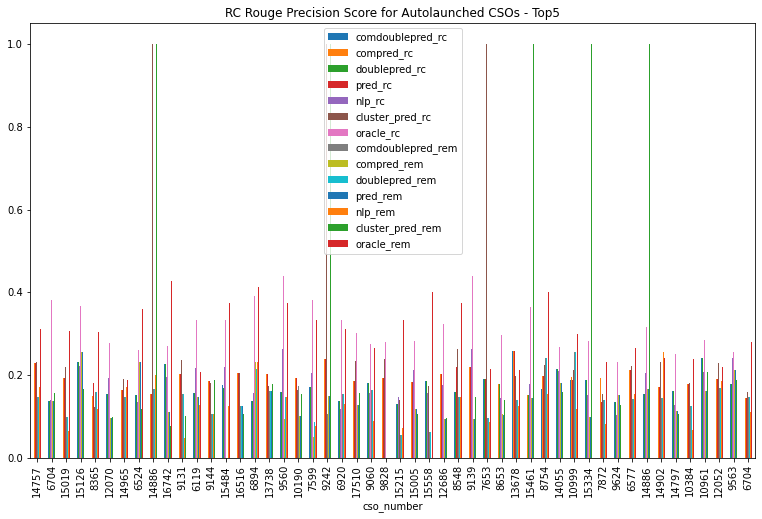

In [321]:
random_cso_rouge_recall_df.plot(x="cso_number", y=show, kind="bar", figsize=(13, 8), title = "RC Rouge Precision Score for Autolaunched CSOs - Top5")
mp.show()

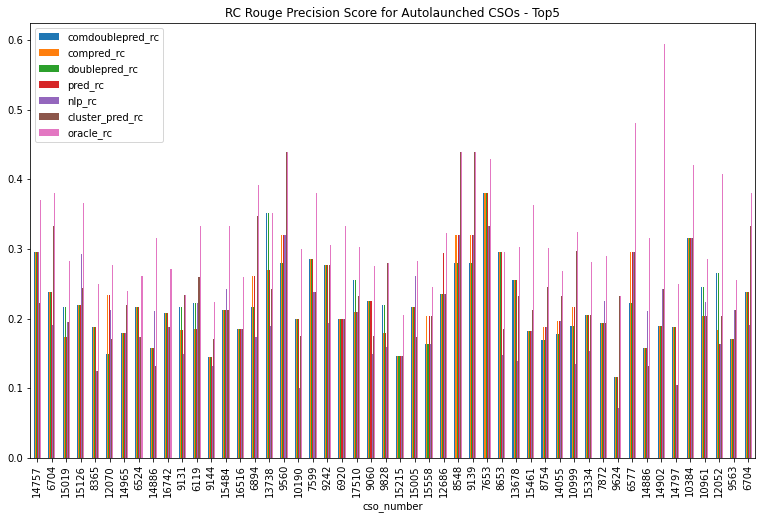

In [264]:
random_cso_rouge_recall_df.plot(x="cso_number", y=show[:int(len(show)/2)], kind="bar", figsize=(13, 8), title = "RC Rouge Precision Score for Autolaunched CSOs - Top5")
mp.show()

In [63]:
json_file = './CSO_data/CSO_all_scraped_Sign.json'
with open(json_file, 'r') as f:
    json_data = json.load(f)

#### Complete vs Complete

In [64]:
## complete vs complete
random_cso_rouge_recall_df = pd.DataFrame(columns=cols)
mode = 'f'
z = 5
for i in random_cso_list:
        print(i, " running")
        series = {}
        series['cso_number'] = int(i)
        index = cso_df.index[cso_df['cso_number']==int(i)].tolist()[0]
        actual_rc = html_stripper(json_data[str(i)]['problems'][0]['u_root_cause_description'])
        actual_rem = html_stripper(json_data[str(i)]['problems'][0]['u_permanent_solution'])

        series['nlp_rc'],series['nlp_rem'],a,b  = max_rouge_og(nlp_pred_random[i], actual_rc, actual_rem, mode,z)
        series['pred_rc'],series['pred_rem'],a,b = max_rouge_og(pred_g1_random[i], actual_rc, actual_rem,mode,z)
        series['compred_rc'],series['compred_rem'],a,b = max_rouge_og(compred_g1_random[i], actual_rc, actual_rem,mode,z)
        series['doublepred_rc'],series['doublepred_rem'],a,b = max_rouge_og(doublepred_g1_random[i], actual_rc, actual_rem,mode,z)
        series['comdoublepred_rc'],series['comdoublepred_rem'],a,b = max_rouge_og(comdoublepred_g1_random[i], actual_rc, actual_rem,mode,z)
        series['cluster_pred_rc'],series['cluster_pred_rem'],a,b  = max_rouge_minus1(combined_cluster_pred_random[i], actual_rc, actual_rem, mode,z)

        series['oracle_rc'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rc_random[i],2),i).values())
        series['oracle_rem'] = max(remove_cso_from_dict(get_top_n_rc(oracle_rem_random[i],2),i).values())

        random_cso_rouge_recall_df = pd.concat([random_cso_rouge_recall_df, pd.DataFrame([series], columns=cols)], ignore_index=True)
random_cso_rouge_recall_df.head()

14757  running
6704  running
15019  running
15126  running


/opt/conda/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


8365  running
12070  running


/opt/conda/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


14965  running
6524  running
14886  running
16742  running
9131  running
6119  running
9144  running
15484  running
16516  running
6894  running
13738  running
9560  running
10190  running


/opt/conda/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


7599  running
9242  running
6920  running
17510  running
9060  running
9828  running
15215  running
15005  running
15558  running
12686  running
8548  running
9139  running
7653  running
8653  running
13678  running
15461  running
8754  running
14055  running
10999  running
15334  running
7872  running
9624  running
6577  running
14886  running
14902  running
14797  running
10384  running
10961  running
12052  running
9563  running
6704  running


,cso_number,comdoublepred_rc,compred_rc,doublepred_rc,pred_rc,nlp_rc,cluster_pred_rc,oracle_rc,comdoublepred_rem,compred_rem,doublepred_rem,pred_rem,nlp_rem,cluster_pred_rem,oracle_rem
0,14757,0.211640,0.211640,0.211640,0.211640,0.230661,0.084367,0.191489,0.142180,0.142180,0.142180,0.142180,0.129730,0.121739,0.192308
1,6704,0.086957,0.142857,0.086957,0.142132,0.265060,0.233333,0.363636,0.189655,0.189655,0.189655,0.189655,0.105263,0.065574,0.242424
2,15019,0.189555,0.189555,0.189555,0.189555,0.170055,0.082840,0.237288,0.074074,0.075472,0.074074,0.075472,0.095238,0.074074,0.161290
3,15126,0.162791,0.162791,0.162791,0.162791,0.213699,0.143541,0.300000,0.115385,0.115385,0.115385,0.115385,0.111111,0.146341,0.400000
4,8365,0.129436,0.163265,0.129436,0.163265,0.152672,0.156522,0.289474,0.164706,0.169014,0.164706,0.164706,0.169014,0.163934,0.343750


In [65]:
show = ['comdoublepred_rc','compred_rc','doublepred_rc','pred_rc','nlp_rc','cluster_pred_rc','oracle_rc','comdoublepred_rem','compred_rem','doublepred_rem','pred_rem','nlp_rem','cluster_pred_rem','oracle_rem']

In [66]:
random_cso_rouge_recall_df[show].mean()

comdoublepred_rc     0.183016
compred_rc           0.186543
doublepred_rc        0.182895
pred_rc              0.182617
nlp_rc               0.181989
cluster_pred_rc      0.130055
oracle_rc            0.285684
comdoublepred_rem    0.124127
compred_rem          0.133417
doublepred_rem       0.125055
pred_rem             0.129507
nlp_rem              0.125770
cluster_pred_rem     0.121220
oracle_rem           0.264013
dtype: float64

In [314]:
random_cso_rouge_recall_df.plot(x="cso_number", y=show, kind="bar", figsize=(13, 8), title = "RC Rouge Precision Score for Autolaunched CSOs - Top5")
mp.show()

TypeError: no numeric data to plot